# 텐서플로우 회귀 분석 모델

- 다양한 방법이 존재
- 텐서플로우2만 사용하는 방법, 케라스를 이용한 방법, 둘을 모두 섞은 방법 등등  


## 선형 회귀(Linear Regression)

In [218]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [219]:
learning_rate = 0.01
training_steps = 1_000

In [220]:
x = np.random.randn(50)
y = 2*x + np.random.randn(50)

In [221]:
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

def linear_regression(x):
    return W * x + b

def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

optimizer = tf.optimizers.SGD(learning_rate)

In [222]:
def run_optimization():
    with tf.GradientTape() as tape:
        y_pred = linear_regression(x)
        loss = mean_square(y_pred, y)

    grads = tape.gradient(loss, [W, b])

    optimizer.apply_gradients(zip(grads, [W, b]))

In [223]:
for step in range(1, training_steps + 1):
    run_optimization()
    
    if step % 50 == 50 - 1:
        y_pred = linear_regression(x)
        loss = mean_square(y_pred, y)
        
        print(f"step: {step:.4f}\t loss: {loss:.4f}\t weights: {W.numpy():.4f}\t bias: {b.numpy():.4f}")

step: 49.0000	 loss: 1.8580	 weights: 1.3168	 bias: -0.3478


step: 99.0000	 loss: 1.5206	 weights: 1.6425	 bias: -0.1176
step: 149.0000	 loss: 1.4664	 weights: 1.7804	 bias: -0.0367
step: 199.0000	 loss: 1.4575	 weights: 1.8390	 bias: -0.0085
step: 249.0000	 loss: 1.4560	 weights: 1.8639	 bias: 0.0012
step: 299.0000	 loss: 1.4557	 weights: 1.8746	 bias: 0.0045
step: 349.0000	 loss: 1.4557	 weights: 1.8791	 bias: 0.0057
step: 399.0000	 loss: 1.4557	 weights: 1.8811	 bias: 0.0060
step: 449.0000	 loss: 1.4557	 weights: 1.8819	 bias: 0.0061
step: 499.0000	 loss: 1.4557	 weights: 1.8822	 bias: 0.0062
step: 549.0000	 loss: 1.4557	 weights: 1.8824	 bias: 0.0062
step: 599.0000	 loss: 1.4557	 weights: 1.8825	 bias: 0.0062
step: 649.0000	 loss: 1.4557	 weights: 1.8825	 bias: 0.0062
step: 699.0000	 loss: 1.4557	 weights: 1.8825	 bias: 0.0062
step: 749.0000	 loss: 1.4557	 weights: 1.8825	 bias: 0.0062
step: 799.0000	 loss: 1.4557	 weights: 1.8825	 bias: 0.0062
step: 849.0000	 loss: 1.4557	 weights: 1.8825	 bias: 0.0062
step: 899.0000	 loss: 1.4557	 weights:

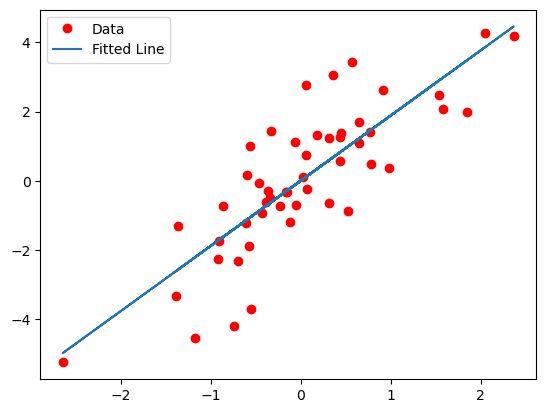

In [224]:
plt.plot(x, y, "ro", label="Data")
plt.plot(x, linear_regression(x), label="Fitted Line")
plt.legend()

plt.show()

## 다항 회귀 (Nonlinear Regression)


### modules import

In [225]:
from tensorflow import keras
from keras.optimizers import Adam

### Hyper Parameters

In [226]:
epcohs = 1_000
learning_rate = 0.04

### 변수 지정

In [227]:
a = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())
c = tf.Variable(np.random.randn())

In [228]:
print(a.numpy())
print(b.numpy())
print(c.numpy())

1.3346068
-0.2564008
2.160909


### 데이터 지정

In [229]:
x = np.random.randn(50)
y = x ** 2 + x * np.random.randn(50)

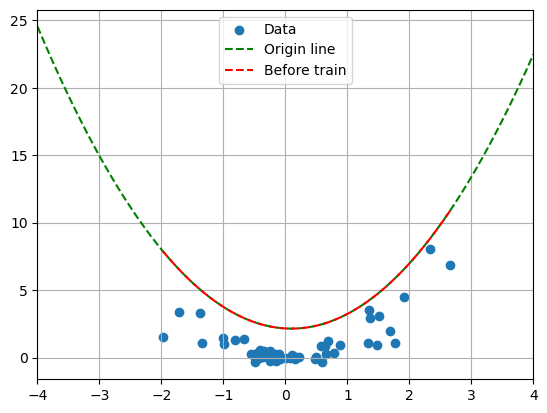

In [230]:
line_x = np.arange(min(x), max(x), 0.001)
line_y = a * line_x ** 2 + b * line_x + c

x_ = np.arange(-4, 4, 0.001)
y_ = a * x_ ** 2 + b * x_ + c

plt.scatter(x, y, label="Data")
plt.plot(x_, y_, "g--", label="Origin line")
plt.plot(line_x, line_y, "r--", label="Before train")

plt.xlim(-4, 4)
plt.legend()
plt.grid()

plt.show()

### Util Functions

In [231]:
def compute_loss():
    y_pred = a * x ** 2 + b * x + c
    loss = tf.reduce_mean((y - y_pred) ** 2)

    return loss

### Optimizer

In [232]:
optimizer = Adam(learning_rate=learning_rate)

### 학습

In [233]:
for epoch in range(1, epcohs + 1):
    optimizer.minimize(compute_loss, var_list=(a, b, c))

    if epoch % 100 == 0:
        print(f"epoch: \t{epoch} a: \t{a.numpy():.4f} b: \t{b.numpy():.4f} c: \t{c.numpy():.4f}")

epoch: 	100 a: 	0.9157 b: 	0.1569 c: 	0.1926
epoch: 	200 a: 	0.9682 b: 	0.1315 c: 	0.0756
epoch: 	300 a: 	0.9679 b: 	0.1317 c: 	0.0762
epoch: 	400 a: 	0.9679 b: 	0.1317 c: 	0.0762
epoch: 	500 a: 	0.9679 b: 	0.1317 c: 	0.0762
epoch: 	600 a: 	0.9679 b: 	0.1317 c: 	0.0762
epoch: 	700 a: 	0.9679 b: 	0.1317 c: 	0.0762
epoch: 	800 a: 	0.9679 b: 	0.1317 c: 	0.0762
epoch: 	900 a: 	0.9679 b: 	0.1317 c: 	0.0762
epoch: 	1000 a: 	0.9679 b: 	0.1317 c: 	0.0762


### 학습 후의 회귀선

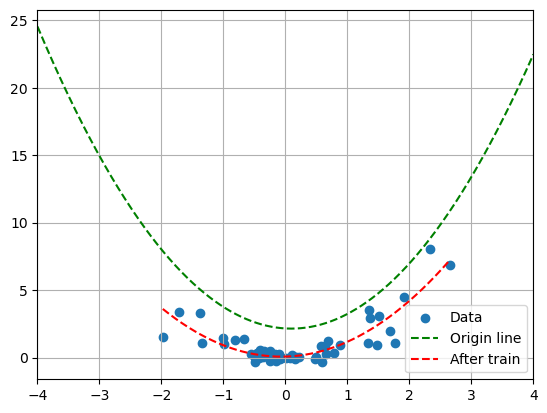

In [234]:
line_x = np.arange(min(x), max(x), 0.001)
line_y = a * line_x ** 2 + b * line_x + c

plt.scatter(x, y, label="Data")
plt.plot(x_, y_, "g--", label="Origin line")
plt.plot(line_x, line_y, "r--", label="After train")

plt.xlim(-4, 4)
plt.legend()
plt.grid()

plt.show()

## 로지스틱 회귀(Logistic Regression)
- 다항 분류, MNIST

### modules import

In [235]:
from keras.datasets import mnist

### 하이퍼 파라미터 (Hyper Parameter)


In [236]:
num_classes = 10
num_feats = 28 * 28

lr = 0.1
training_steps = 5_000
batch_size = 256

### 데이터 로드

In [237]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = np.array(x_train).astype(np.float32), np.array(x_test).astype(np.float32)
x_train, x_test = x_train.reshape(-1, num_feats), x_test.reshape(-1, num_feats)

x_train, x_test = x_train / 255, x_test / 255

### tf.data API 사용
- 03 에서 다시 다룸

In [238]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(25_000).batch(batch_size).prefetch(1)

### 변수 지정

In [239]:
W = tf.Variable(tf.random.normal([num_feats, num_classes]), name="weight")
b = tf.Variable(tf.zeros([num_classes]), name="bias")

### Util Functions

In [240]:
def logistic_regression(x):
    return tf.nn.softmax(tf.matmul(x, W) + b)

def cross_entropy(y_pred, y_true):
    y_true = tf.one_hot(y_true, depth=num_classes)
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1)

    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred), 1))

def accuracy(y_pred, y_true):
    correct_pred = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Optimizer

In [241]:
optimizer = tf.optimizers.SGD(learning_rate=lr)

In [242]:
def run_optimization(x, y):
    with tf.GradientTape() as tape:
        y_pred = logistic_regression(x)
        loss = cross_entropy(y_pred, y)
    
    grads = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(grads, [W, b]))

### 학습 진행

In [243]:
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)

    if step % 500 == 0:
        y_pred = logistic_regression(batch_x)
        loss = cross_entropy(y_pred, batch_y)
        acc = accuracy(y_pred, batch_y)

        print(f"step: {step}\tloss: {loss:.4f}\taccuracy: {acc:.4f}\t")

step: 500	loss: 1.2278	accuracy: 0.7617	
step: 1000	loss: 0.7941	accuracy: 0.8242	
step: 1500	loss: 0.6794	accuracy: 0.8477	
step: 2000	loss: 0.6900	accuracy: 0.8516	
step: 2500	loss: 0.7031	accuracy: 0.8750	
step: 3000	loss: 0.4676	accuracy: 0.8750	
step: 3500	loss: 0.8750	accuracy: 0.8086	
step: 4000	loss: 0.6177	accuracy: 0.8516	
step: 4500	loss: 0.6328	accuracy: 0.8633	
step: 5000	loss: 0.4686	accuracy: 0.8828	


###  테스트

In [244]:
y_pred = logistic_regression(x_test)

print(f"Test Accuracy: {accuracy(y_pred, y_test)}")

Test Accuracy: 0.8802000284194946


### 시각화

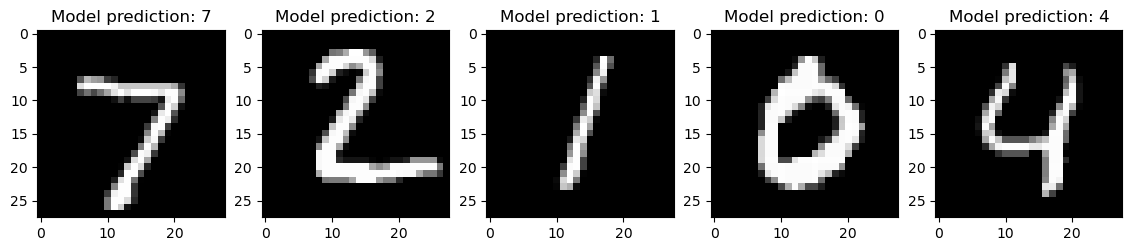

In [249]:
num_imgs = 5
test_imgs = x_test[:num_imgs]
pred = logistic_regression(test_imgs)

plt.figure(figsize=(14, 8))

for i in range(1, num_imgs + 1):
    plt.subplot(1, num_imgs, i)
    plt.imshow(np.reshape(test_imgs[i - 1], [28, 28]), cmap="gray")
    plt.title(f"Model prediction: {np.argmax(pred.numpy()[i - 1])}")

plt.show()